In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import os
import pathlib

## Чтение агрегированных данных

In [2]:
PROFILES_DIR = "profiles"
AGGREGATE_DIR = "aggregate"
ANALYSIS_DIR = "analysis"
DATA_DIR = "data"

ANALYSIS = os.path.join(DATA_DIR, ANALYSIS_DIR)
pathlib.Path(ANALYSIS).mkdir(parents=True, exist_ok=True)

In [3]:
full_df = pd.read_csv(os.path.join(DATA_DIR, "full_data.csv"), delimiter=",")

In [4]:
sizes = dict()
for file in os.listdir(os.path.join(DATA_DIR, AGGREGATE_DIR)):
    df = pd.read_csv(os.path.join(DATA_DIR, AGGREGATE_DIR, file))
    sizes[file] = len(df)

files = sorted(list(sizes.items()), key=lambda x: x[1], reverse=True)[:10]
services = [x[0].split(".")[0] for x in files]
print("Top 10 services:\nTitle\tCount")
print(*files, sep="\n")
top_10 = []
for file in files:
    df = pd.read_csv(os.path.join(DATA_DIR, AGGREGATE_DIR, file[0]))
    top_10.append(df)

Top 10 services:
Title	Count
('английский_язык.csv', 43176)
('математика.csv', 31084)
('русский_язык.csv', 15216)
('начальная_школа.csv', 14755)
('физика.csv', 10793)
('подготовка_к_школе.csv', 8370)
('егэ_по_английскому_языку.csv', 7848)
('подготовка_к_экзаменам.csv', 7366)
('обществознание.csv', 6920)
('химия.csv', 6726)


In [5]:
full_df

,prof_id,name,gender,rating,reviews,m1,m2,m3,m4,m5,services,trust,url
0,AbaulinaAA,Анастасия Александровна Абаулина,FEMALE,5.00,1,0,0,0,0,1,"['английский язык', 'общий английский']",NaN,https://profi.ru/profile/AbaulinaAA/
1,AbdekovAM,Алибек Мауленович Абдеков,MALE,0.00,0,0,0,0,0,0,"['математика', 'высшая математика', 'математич...",NaN,https://profi.ru/profile/AbdekovAM/
2,AbaevAO,Азамат Олегович Абаев,MALE,0.00,0,0,0,0,0,0,['математика'],NaN,https://profi.ru/profile/AbaevAO/
3,AbdulaevaEG,Эльмира Гасановна Абдулаева,FEMALE,5.00,4,0,0,0,0,4,"['английский язык', 'британский английский язы...",NaN,https://profi.ru/profile/AbdulaevaEG/
4,AbalyanMD,Марина Дионисовна Абалян,FEMALE,4.78,36,1,1,0,1,33,"['английский язык', 'ОГЭ по английскому языку'...",NaN,https://profi.ru/profile/AbalyanMD/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140038,CherevatenkoED,Егор Денисович Череватенко,MALE,5.00,1,0,0,0,0,1,"['математика', 'элементарная математика', 'алг...",NaN,https://profi.ru/profile/CherevatenkoED/
140039,ChepelevskiiSS,Станислав Сергеевич Чепелевский,MALE,5.00,1,0,0,0,0,1,"['английский язык', 'испанский язык']",NaN,https://profi.ru/profile/ChepelevskiiSS/
140040,ChemelAA,Александр Алексеевич Чемель,MALE,0.00,0,0,0,0,0,0,"['математика', 'физика', 'ОГЭ по математике']",NaN,https://profi.ru/profile/ChemelAA/
140041,CherepanovaAA12,Анастасия Алексеевна Черепанова,FEMALE,0.00,0,0,0,0,0,0,"['литература', 'русский язык', 'английский язык']",NaN,https://profi.ru/profile/CherepanovaAA12/


In [6]:
top_10[0].head()

,prof_id,name,gender,rating,reviews,m1,m2,m3,m4,m5,trust,url
0,AbaulinaAA,Анастасия Александровна Абаулина,FEMALE,5.00,1,0,0,0,0,1,NaN,https://profi.ru/profile/AbaulinaAA/
1,AbdulaevaEG,Эльмира Гасановна Абдулаева,FEMALE,5.00,4,0,0,0,0,4,NaN,https://profi.ru/profile/AbdulaevaEG/
2,AbalyanMD,Марина Дионисовна Абалян,FEMALE,4.78,36,1,1,0,1,33,NaN,https://profi.ru/profile/AbalyanMD/
3,AbdelrazekRE,Рехам Емад Абделразек,NaN,0.00,0,0,0,0,0,0,NaN,https://profi.ru/profile/AbdelrazekRE/
4,AbdullaevaRR2,Разаля Рашидовна Абдуллаева,NaN,0.00,0,0,0,0,0,0,NaN,https://profi.ru/profile/AbdullaevaRR2/


## Общая обработка и сравнительные графики

In [12]:
def calc_ration(total, *counts):
    return [cnt / total for cnt in counts]

def calc_gender_ratio(df):
    total = len(df)
    male = len(df[df["gender"] == "MALE"])
    female = len(df[df["gender"] == "FEMALE"])
    nan = len(df[pd.isnull(df["gender"])])
    return calc_ration(total, male, female, nan)


def draw_by_gender(percents, suffix=""):
    count = len(percents[0])
    fig, ax = plt.subplots(figsize=(20, 6))
    plt.grid(True)
    plt.gray()
    width = 0.2

    b1 = ax.bar([i + 0.00 for i in range(1, count + 1)], percents[0], width, label="MALE")
    b2 = ax.bar([i + 0.2 for i in range(1, count + 1)], percents[1], width, label="FEMALE")
    b3 = ax.bar([i + 0.4 for i in range(1, count + 1)], percents[2], width, label="NaN")
    if len(percents) > 3:
        b4 = ax.bar([i + 0.6 for i in range(1, count + 1)], percents[3], width, label="All")

    ax.set_xticks([i + 0.3 for i in range(1, count + 1)])
    ax.set_xticklabels(["Все"] + services, rotation=90)
    ax.set_ylabel("Ratio")
    ax.legend(loc='upper left')
    title = "Распределение по предметам " + suffix
    plt.title(title)
    plt.savefig(os.path.join(ANALYSIS, title + ".pdf"))
    plt.show()

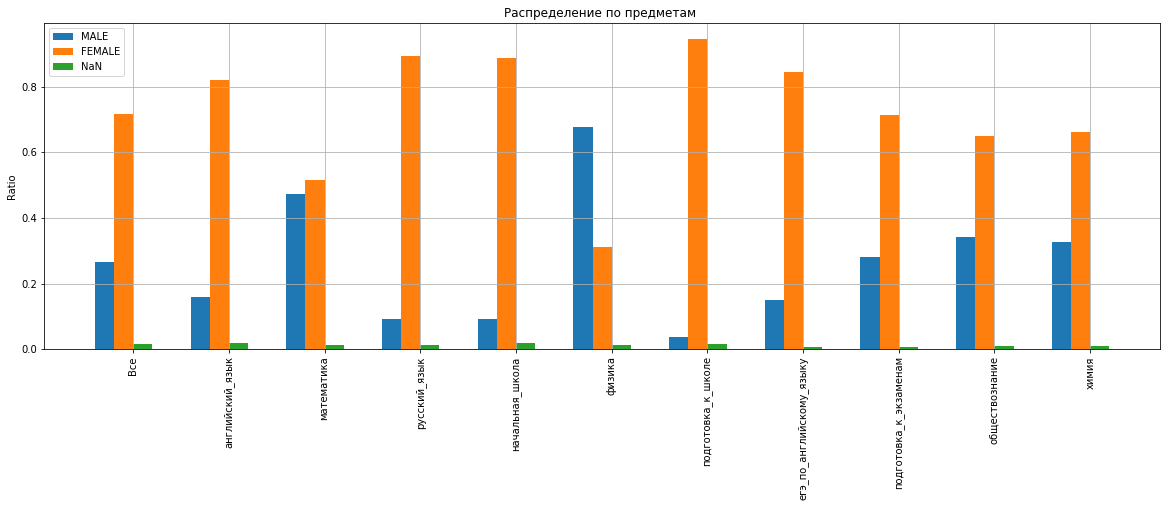

In [13]:
gr_total = [[], [], []]
for df in [full_df] + top_10:
    percent = calc_gender_ratio(df)
    gr_total[0].append(percent[0])
    gr_total[1].append(percent[1])
    gr_total[2].append(percent[2])

draw_by_gender(gr_total)

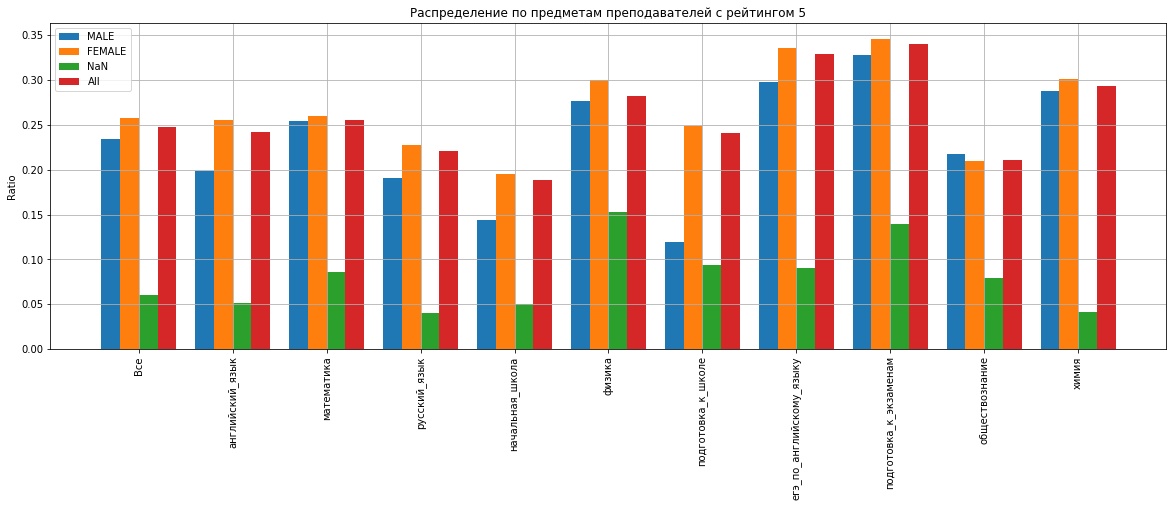

In [9]:
def calc_best_ratio(df):
    return len(df[df["rating"] == 5.0]) / len(df)

gr_best = [[], [], [], []]
for df in [full_df] + top_10:
    gr_best[0].append(calc_best_ratio(df[df["gender"] == "MALE"]))
    gr_best[1].append(calc_best_ratio(df[df["gender"] == "FEMALE"]))
    gr_best[2].append(calc_best_ratio(df[pd.isnull(df["gender"])]))
    gr_best[3].append(calc_best_ratio(df))

draw_by_gender(gr_best, suffix="преподавателей с рейтингом 5")

## Обработка отдельных предметов

In [16]:
def build(dataset, service):
    print("Total describe")
    print(dataset.describe().to_string())

    male_df = dataset[dataset["gender"] == "MALE"].sort_values(by=["rating"])
    female_df = dataset[dataset["gender"] == "FEMALE"].sort_values(by=["rating"])
    nan_df = dataset[pd.isnull(dataset["gender"])].sort_values(by=["rating"])

    print()
    print("MALE count:", len(male_df))
    print("FEMALE count:", len(female_df))
    print("NaN count:", len(nan_df))
    
    print("\nMALE describe")
    print(male_df.describe().to_string())
    print("\nFEMALE describe")
    print(female_df.describe().to_string())
    print("\nNaN describe")
    print(nan_df.describe().to_string())

    plt.figure(figsize=(15, 6))
    plt.grid(True)
    plt.hist(female_df["rating"].to_list(), label="FEMALE", alpha=0.5)
    plt.hist(male_df["rating"].to_list(), label="MALE", alpha=0.5)
    plt.hist(nan_df["rating"].to_list(), label="None", alpha=0.25)
    plt.hist(dataset["rating"].to_list(), label="All", alpha=0.25)
    plt.legend()
    plt.ylabel("Count")
    plt.xlabel("Rating")
    title = f"Распределение рейтинга преподавателей, {service}"
    plt.title(title)
    plt.savefig(os.path.join(ANALYSIS, title + ".png"))
    plt.show()

    
    best_df = dataset[dataset["rating"] == 5.0]

    plt.figure(figsize=(15, 6))
    plt.grid(True)
    plt.hist(best_df.sort_values(by=["reviews"])["reviews"].to_list(), bins=100)
    plt.ylabel("Count")
    plt.xlabel("Reviews count")
    title = f"Распределение числа отзывов по преподавателям с рейтингом 5, {service}"
    plt.title(title)
    plt.savefig(os.path.join(ANALYSIS, title + ".png"))
    plt.show()

Start английский_язык, rows count: 43176
Total describe
             rating       reviews            m1            m2            m3            m4            m5
count  43176.000000  43176.000000  43176.000000  43176.000000  43176.000000  43176.000000  43176.000000
mean       1.861555      3.535297      0.002339      0.029716      0.057879      0.237261      3.208102
std        2.374402     10.638598      0.057905      0.213980      0.337927      0.961030      9.686492
min        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
75%        4.950000      2.000000      0.000000      0.000000      0.000000      0.000000      2.000000
max        5.000000    399.000000      5.000000      9.000000     10.000000     36.000000    350.000000

MALE co

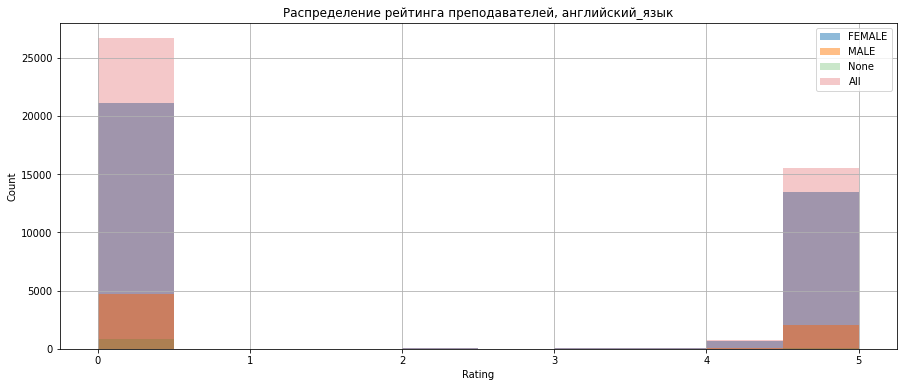

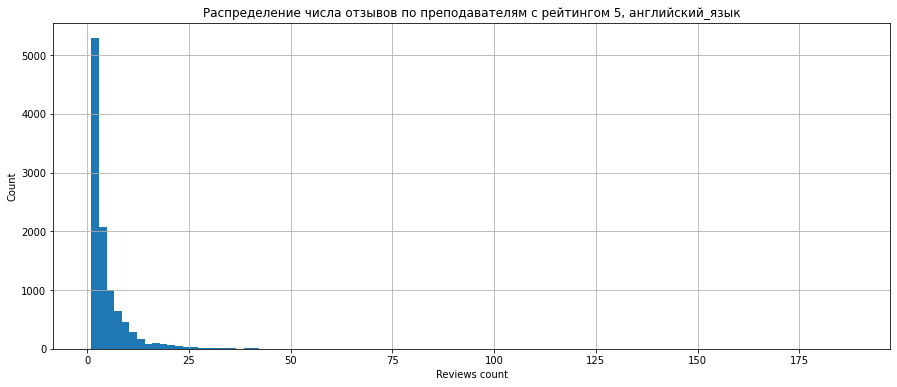







Start математика, rows count: 31084
Total describe
             rating       reviews            m1            m2            m3            m4            m5
count  31084.000000  31084.000000  31084.000000  31084.000000  31084.000000  31084.000000  31084.000000
mean       2.222535      5.753700      0.002895      0.048932      0.113660      0.417996      5.170216
std        2.427666     16.387639      0.062583      0.292238      0.544912      1.439310     14.873318
min        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
75%        5.000000      4.000000      0.000000      0.000000      0.000000      0.000000      4.000000
max        5.000000    513.000000      5.000000     11.000000     16.000000     38.000000    460.000000

MALE c

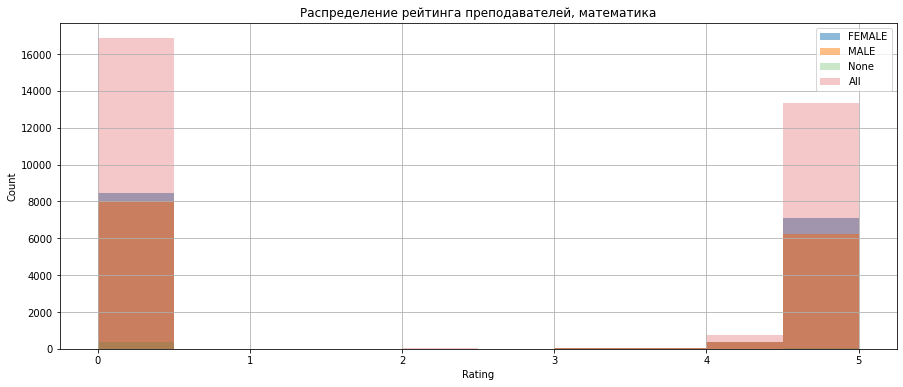

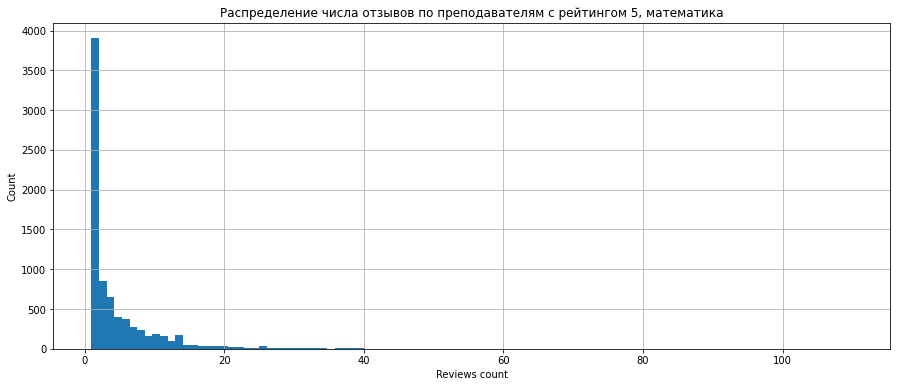







Start русский_язык, rows count: 15216
Total describe
             rating       reviews            m1            m2            m3            m4            m5
count  15216.000000  15216.000000  15216.000000  15216.000000  15216.000000  15216.000000  15216.000000
mean       1.864950      4.906743      0.002563      0.039826      0.078339      0.301919      4.484096
std        2.375151     14.083700      0.051847      0.259915      0.404755      1.100503     12.988810
min        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
75%        4.920000      3.000000      0.000000      0.000000      0.000000      0.000000      3.000000
max        5.000000    277.000000      2.000000      9.000000     11.000000     22.000000    271.000000

MALE

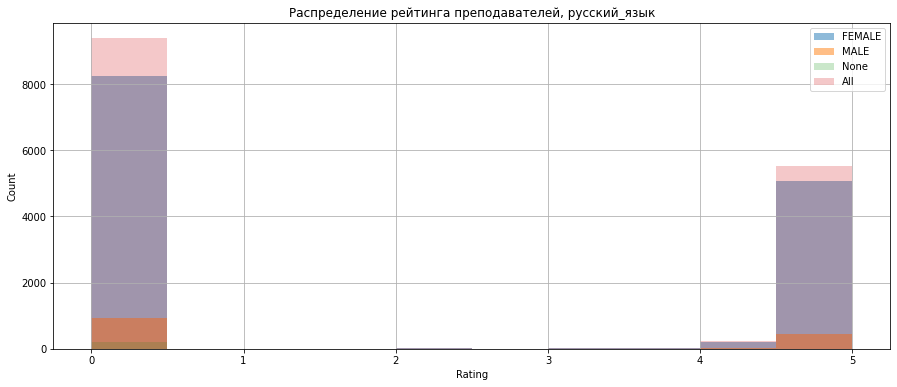

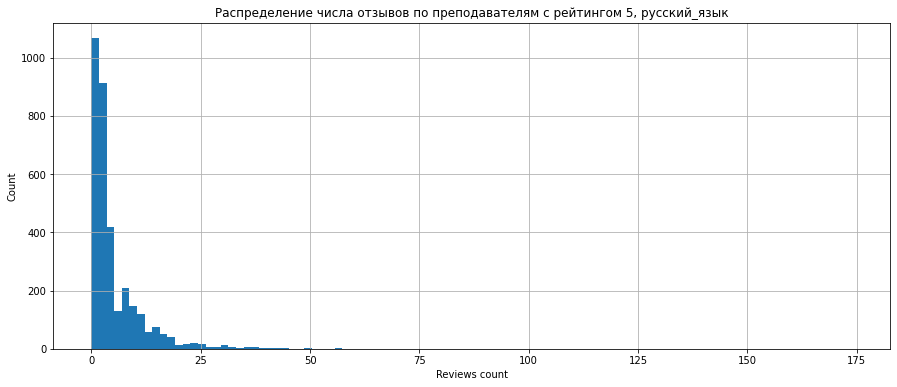







Start начальная_школа, rows count: 14755
Total describe
             rating       reviews            m1            m2            m3            m4            m5
count  14755.000000  14755.000000  14755.000000  14755.000000  14755.000000  14755.000000  14755.000000
mean       1.449178      2.874754      0.002643      0.029278      0.056388      0.195662      2.590783
std        2.233303      9.805782      0.052649      0.251248      0.371942      0.926619      8.761124
min        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
75%        4.750000      1.000000      0.000000      0.000000      0.000000      0.000000      1.000000
max        5.000000    301.000000      2.000000     16.000000     15.000000     29.000000    241.000000

M

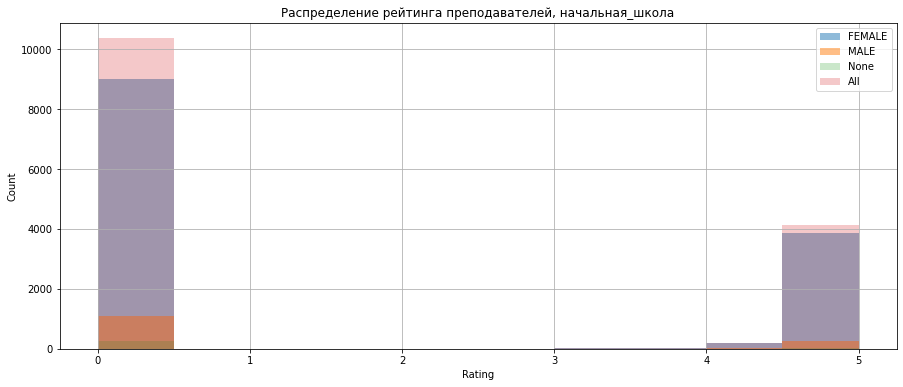

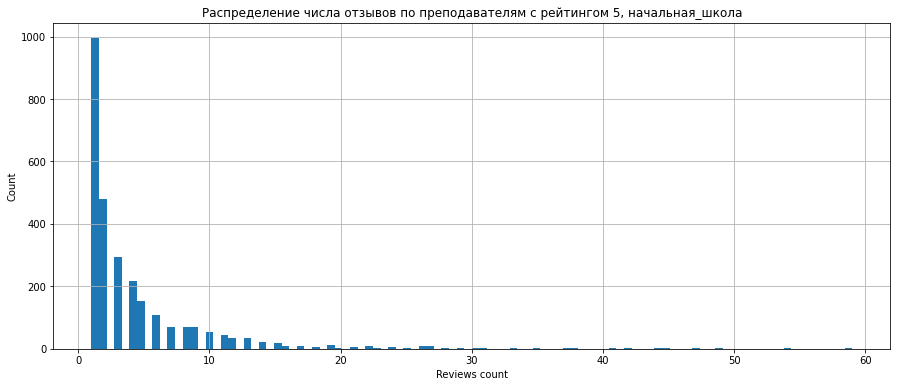







Start физика, rows count: 10793
Total describe
             rating       reviews            m1            m2            m3            m4            m5
count  10793.000000  10793.000000  10793.000000  10793.000000  10793.000000  10793.000000  10793.000000
mean       2.566725      7.183452      0.004077      0.064857      0.151765      0.554526      6.408228
std        2.430169     19.619851      0.078096      0.345011      0.644689      1.751420     17.773348
min        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
50%        4.330000      1.000000      0.000000      0.000000      0.000000      0.000000      1.000000
75%        5.000000      6.000000      0.000000      0.000000      0.000000      0.000000      5.000000
max        5.000000    513.000000      5.000000      7.000000     13.000000     38.000000    460.000000

MALE count

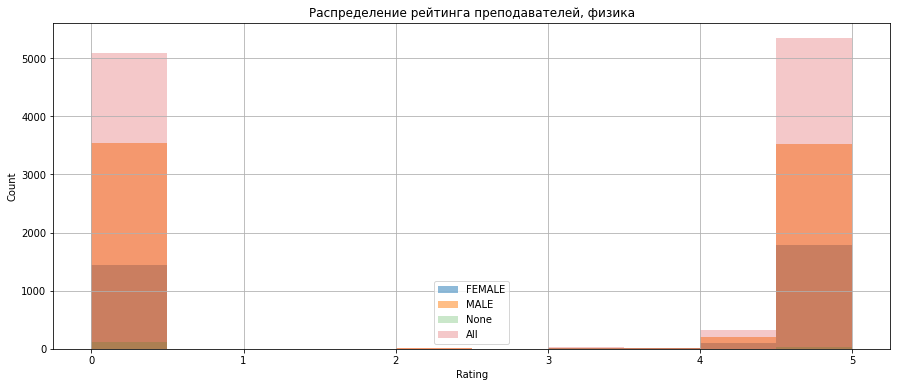

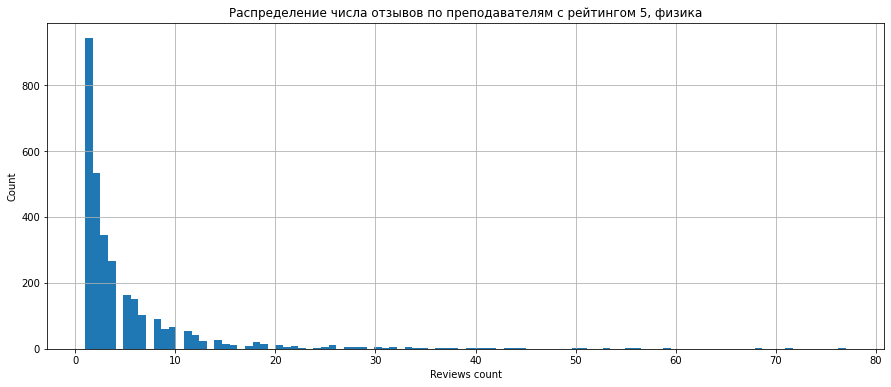







Start подготовка_к_школе, rows count: 8370
Total describe
            rating      reviews           m1           m2           m3           m4           m5
count  8370.000000  8370.000000  8370.000000  8370.000000  8370.000000  8370.000000  8370.000000
mean      2.038783     4.861051     0.003226     0.051016     0.088530     0.322820     4.395460
std       2.409634    12.724145     0.058777     0.332135     0.461364     1.163929    11.427187
min       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
75%       4.960000     4.000000     0.000000     0.000000     0.000000     0.000000     3.000000
max       5.000000   301.000000     2.000000    16.000000    15.000000    29.000000   241.000000

MALE count: 309
FEMALE count: 7922
NaN count: 139

MALE descri

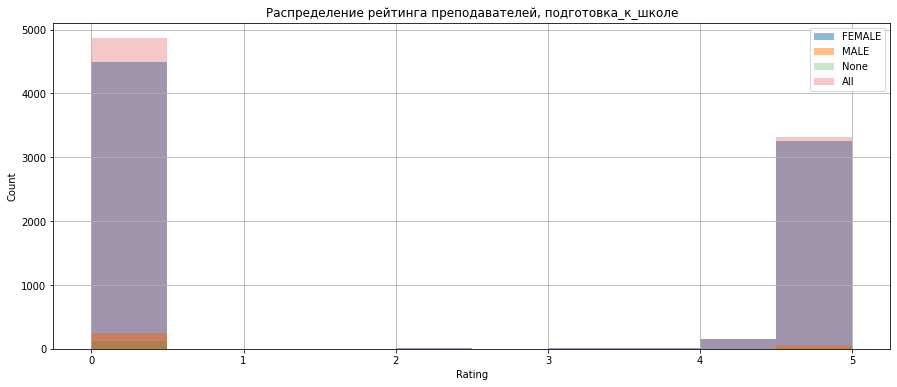

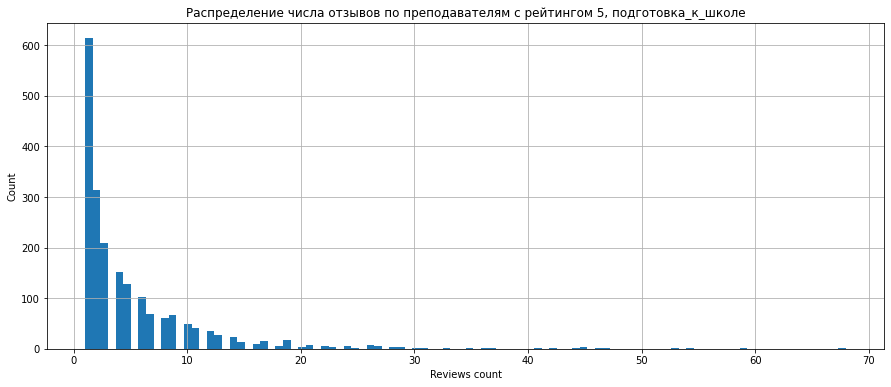







Start егэ_по_английскому_языку, rows count: 7848
Total describe
            rating      reviews           m1           m2           m3          m4           m5
count  7848.000000  7848.000000  7848.000000  7848.000000  7848.000000  7848.00000  7848.000000
mean      2.756462     6.348751     0.002548     0.049822     0.097604     0.42393     5.774847
std       2.423157    13.693576     0.050421     0.258787     0.421669     1.25446    12.548167
min       0.000000     0.000000     0.000000     0.000000     0.000000     0.00000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000     0.00000     0.000000
50%       4.670000     1.000000     0.000000     0.000000     0.000000     0.00000     1.000000
75%       5.000000     7.000000     0.000000     0.000000     0.000000     0.00000     6.000000
max       5.000000   226.000000     1.000000     4.000000     8.000000    21.00000   219.000000

MALE count: 1175
FEMALE count: 6629
NaN count: 44

MALE describe


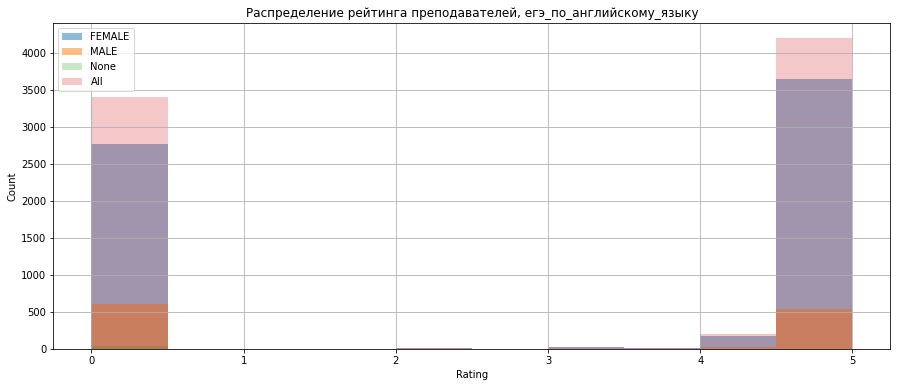

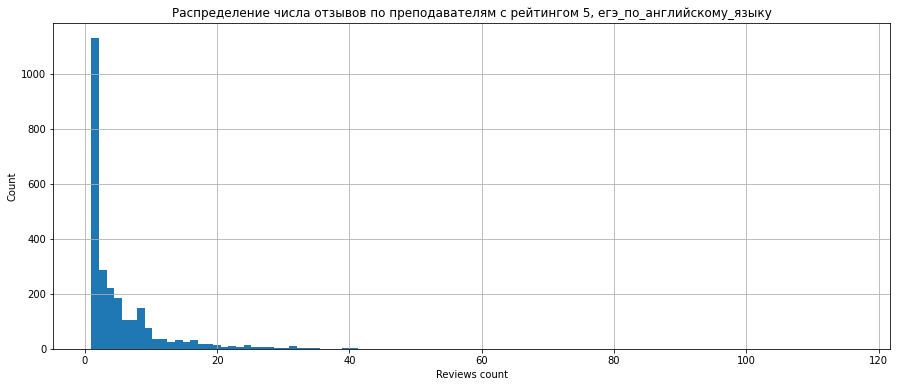







Start подготовка_к_экзаменам, rows count: 7366
Total describe
            rating      reviews           m1           m2           m3           m4           m5
count  7366.000000  7366.000000  7366.000000  7366.000000  7366.000000  7366.000000  7366.000000
mean      3.557630    14.005566     0.007331     0.106978     0.220472     0.884605    12.786180
std       2.172633    24.284031     0.088438     0.428721     0.709163     1.982884    22.317654
min       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
50%       4.870000     5.000000     0.000000     0.000000     0.000000     0.000000     4.000000
75%       5.000000    17.000000     0.000000     0.000000     0.000000     1.000000    16.000000
max       5.000000   428.000000     2.000000     7.000000    12.000000    35.000000   386.000000

MALE count: 2071
FEMALE count: 5252
NaN count: 43

MALE de

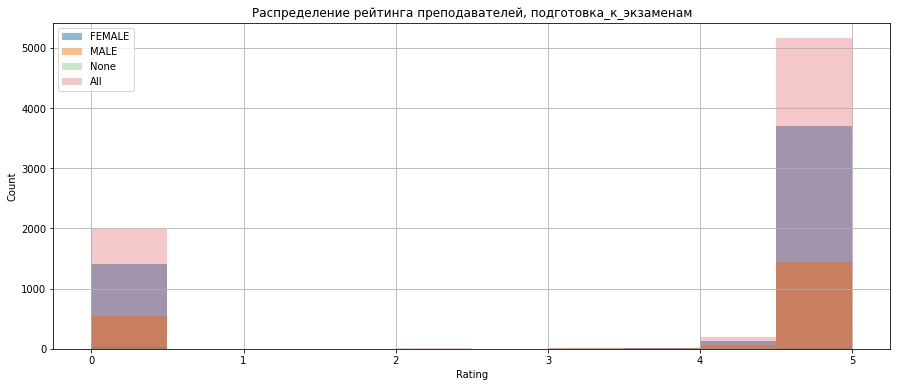

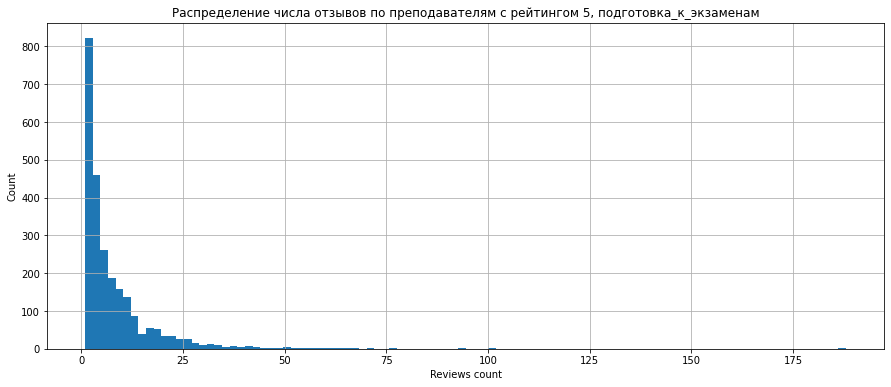







Start обществознание, rows count: 6920
Total describe
            rating      reviews           m1           m2           m3           m4           m5
count  6920.000000  6920.000000  6920.000000  6920.000000  6920.000000  6920.000000  6920.000000
mean      1.767049     5.002890     0.002312     0.039017     0.085549     0.286994     4.589017
std       2.348534    15.636174     0.050953     0.259371     0.450041     1.180123    14.474308
min       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
75%       4.900000     2.000000     0.000000     0.000000     0.000000     0.000000     2.000000
max       5.000000   379.000000     2.000000     6.000000    10.000000    29.000000   373.000000

MALE count: 2370
FEMALE count: 4487
NaN count: 63

MALE describe
 

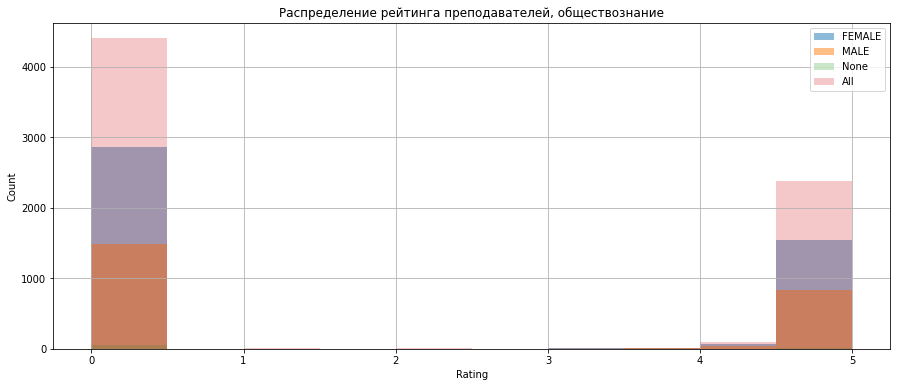

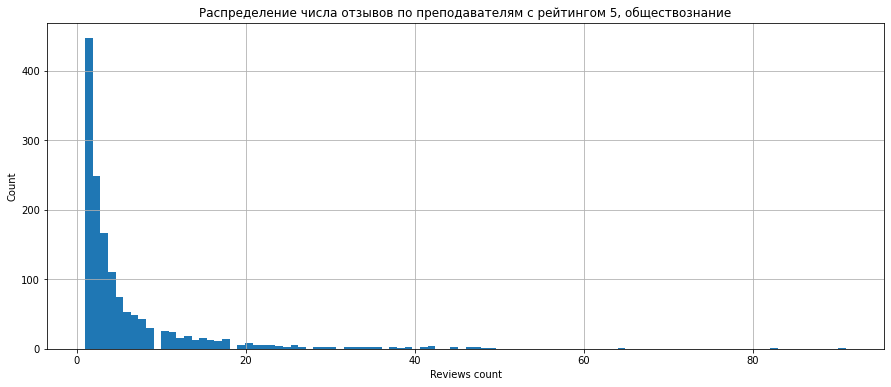







Start химия, rows count: 6726
Total describe
            rating      reviews           m1           m2           m3           m4           m5
count  6726.000000  6726.000000  6726.000000  6726.000000  6726.000000  6726.000000  6726.000000
mean      2.370746     5.845376     0.003122     0.037467     0.088314     0.354148     5.362325
std       2.447656    15.542728     0.058398     0.243444     0.439591     1.198042    14.392470
min       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
75%       5.000000     5.000000     0.000000     0.000000     0.000000     0.000000     4.000000
max       5.000000   278.000000     2.000000     6.000000    11.000000    23.000000   272.000000

MALE count: 2196
FEMALE count: 4457
NaN count: 73

MALE describe
          

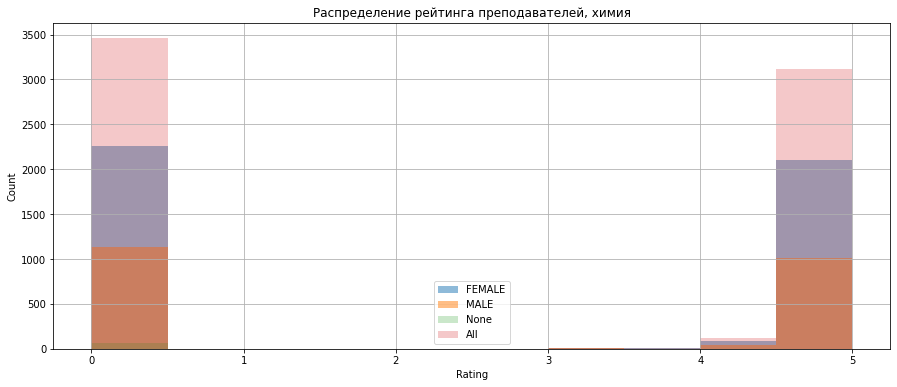

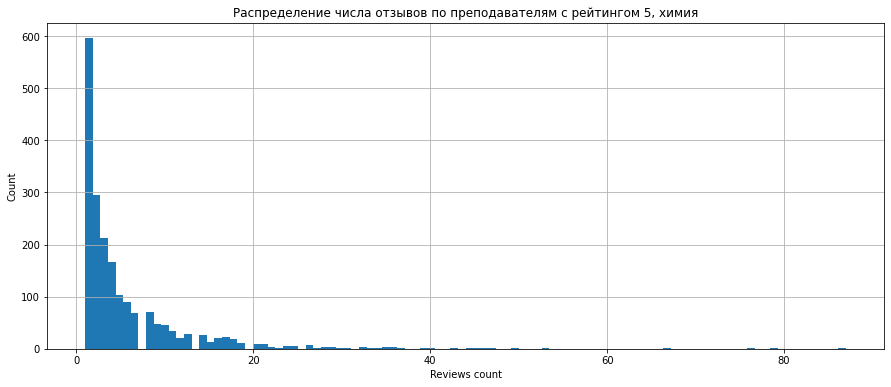

In [17]:
for index in range(len(files)):
    print(f"Start {services[index]}, rows count: {files[index][1]}")
    build(top_10[index], services[index])
    print("\n\n\n\n\n")